In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
advTeamStats = pd.read_csv("Basketball_Stats/advanced_team_stats.csv")
finalSVUStats = pd.read_csv("Basketball_Stats/final_svu_teams.csv")
miscTeamStats = pd.read_csv("Basketball_Stats/misc_team_stats.csv")
winslosses = pd.read_csv("Basketball_Stats/nbaseas1.csv")
shotinfo = pd.read_csv("Basketball_Stats/nbaseas2.csv")
NBAstatsTeam = pd.read_csv("Basketball_Stats/nbaseasadv.csv")
teamDef = pd.read_csv("Basketball_Stats/nbaTeamDef2014_2016.csv")

In [3]:
advTeamStats.head()

,ast_pct,ast_ratio,ast_tov,def_rating,dreb_pct,efg_pct,game_id,min,off_rating,opponent_id,oreb_pct,pace,period,pie,season,team_id,tm_tov_pct,treb_pct,ts_pct,usg_pct,team
0,0.650,19.6,1.37,110.6,0.667,0.581,21400008,240:00:00,105.7,1610612761,0.238,97.50,f,0.453,2014,1610612737,19.7,0,0.583,0.196,Hawks
1,0.743,21.2,2.00,94.6,0.756,0.558,21400032,240:00:00,109.1,1610612754,0.083,95.38,f,0.606,2014,1610612737,13.9,0,0.611,0.198,Hawks
2,0.684,19.0,1.86,98.2,0.711,0.457,21400064,240:00:00,91.2,1610612759,0.204,98.28,f,0.439,2014,1610612737,13.9,0,0.475,0.198,Hawks
3,0.615,17.3,1.41,100.0,0.744,0.523,21400071,265:00:00,102.4,1610612766,0.159,98.46,f,0.458,2014,1610612737,15.8,0,0.564,0.200,Hawks
4,0.545,14.5,2.00,105.7,0.690,0.463,21400084,240:00:00,109.8,1610612752,0.279,92.34,f,0.541,2014,1610612737,9.6,0,0.532,0.198,Hawks


In [4]:
finalSVUStats.head()

,cfga,cfgm,dfga,dfgm,dist,drbc,ftast,game_id,opponent_id,orbc,pass,period,sast,season,spd,tchs,team_id,ufga,ufgm,team
0,39,17,33,13,9.99,56,3,21400008,1610612761,23,127,f,9,2014,0,127,1610612737,41,23,Hawks
1,28,12,26,17,9.99,58,4,21400032,1610612754,12,127,f,5,2014,0,127,1610612737,41,23,Hawks
2,51,23,35,19,9.99,50,1,21400064,1610612759,32,127,f,3,2014,0,127,1610612737,41,15,Hawks
3,45,21,34,23,9.99,53,1,21400071,1610612766,14,127,f,6,2014,0,127,1610612737,48,22,Hawks
4,42,19,35,23,9.99,52,3,21400084,1610612752,21,127,f,4,2014,0,127,1610612737,39,14,Hawks


In [5]:
miscTeamStats.head()

,blk,blka,game_id,opp_pts_2nd_chance,opp_pts_fb,opp_pts_off_tov,opp_pts_paint,opponent_id,period,pf,pfd,pts_2nd_chance,pts_fb,pts_off_tov,pts_paint,season,team_id,team
0,8,9,21400008,26,18,23,40,1610612761,f,24,22,11,10,14,36,2014,1610612737,Hawks
1,6,5,21400032,24,5,13,26,1610612754,f,20,26,5,15,20,28,2014,1610612737,Hawks
2,5,9,21400064,14,18,15,34,1610612759,f,25,15,13,11,14,40,2014,1610612737,Hawks
3,2,7,21400071,22,1,22,50,1610612766,f,30,28,11,15,18,38,2014,1610612737,Hawks
4,5,6,21400084,15,9,12,40,1610612752,f,17,29,19,10,17,34,2014,1610612737,Hawks


In [6]:
# Andy - stored shot info into new variable - shotinfo_update so that 'Team' permanently changes to 'team'
shotinfo_update = shotinfo.rename(columns = {"Team":"team"})

In [7]:
# Andy - print shot_info update to verify 'Team" changed to 'team'
shotinfo_update.head()

,team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Warriors,2014,3410,7137,47.8,2527,4920,0.513618,883,2217,39.8,1313,1709,76.8,853,2814,3667,2248,1185,762,496,293,1628,1541,828
1,Hawks,2014,3121,6699,46.6,2303,4547,0.506488,818,2152,38.0,1349,1735,77.8,715,2611,3326,2111,1167,744,380,404,1457,1611,445
2,Rockets,2014,3032,6832,44.4,2099,4152,0.505539,933,2680,34.8,1525,2133,71.5,958,2624,3582,1820,1366,776,407,437,1803,1730,282
3,Clippers,2014,3228,6830,47.3,2401,4628,0.518799,827,2202,37.6,1468,2067,71.0,784,2711,3495,2031,1012,640,409,245,1749,1766,540
4,Grizzlies,2014,3097,6763,45.8,2674,5517,0.484684,423,1246,33.9,1445,1869,77.3,856,2634,3490,1777,1094,700,347,424,1567,1662,266


In [ ]:
# Andy - save shotinfo_update to csv to change Blazers to Trail Blazers
# shotinfo_update.to_csv('shotinfo_fixblazers.csv')

In [8]:
# Andy reimport shotinfo_fixblazers 
shotinfo_final = pd.read_csv('shotinfo_fixblazers.csv')

In [9]:
advmiscteam = advTeamStats.merge(miscTeamStats,on="game_id")

In [10]:
advmiscsvuDF = advmiscteam.merge(finalSVUStats,on="game_id")

In [11]:
teamsDF = advmiscsvuDF[['game_id','team','season','ufga','ufgm','pts_off_tov','pts_paint']]
teamsDF.head()

,game_id,team,season,ufga,ufgm,pts_off_tov,pts_paint
0,21400008,Hawks,2014,41,23,14,36
1,21400008,Raptors,2014,43,17,14,36
2,21400008,Hawks,2014,41,23,23,40
3,21400008,Raptors,2014,43,17,23,40
4,21400008,Hawks,2014,41,23,14,36


In [12]:
teamsDF2 = teamsDF.groupby(["team","game_id","season"]).sum()

In [13]:
teamsDF3 = teamsDF2.reset_index()
teamsDF3.head()

,team,game_id,season,ufga,ufgm,pts_off_tov,pts_paint
0,76ers,21400005,2014,88,32,74,160
1,76ers,21400023,2014,132,52,86,184
2,76ers,21400030,2014,124,60,100,160
3,76ers,21400043,2014,144,68,124,132
4,76ers,21400058,2014,156,68,68,200


In [14]:
teamsDF4 = teamsDF3[['team','season','ufga','ufgm','pts_off_tov','pts_paint']]
teamsDF4.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint
0,76ers,2014,88,32,74,160
1,76ers,2014,132,52,86,184
2,76ers,2014,124,60,100,160
3,76ers,2014,144,68,124,132
4,76ers,2014,156,68,68,200


df1 = teamsDF4.loc[teamsDF4["team"]=="Bulls"]

writer = pd.ExcelWriter('NBA.xlsx')
df1.to_excel(writer,'Sheet1')


In [15]:
teamsDF5 = teamsDF4.groupby(["team","season"]).sum()
teamsDF6 = teamsDF5.reset_index()
teamsDF6["ufgp"] = teamsDF6["ufgm"] / teamsDF6["ufga"]
teamsDF6.sort_values("ufgp",ascending = False).head()


,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp
85,Warriors,2015,16728,8280,6948,18348,0.494978
89,Wizards,2016,1384,648,608,1512,0.468208
84,Warriors,2014,16408,7664,7050,17724,0.467089
86,Warriors,2016,1436,668,640,1684,0.465181
15,Clippers,2014,16248,7528,5926,15028,0.463319


df1 = teamsDF5
writer = pd.ExcelWriter('NBADF.xlsx')
df1.to_excel(writer,'Sheet1')


In [16]:
winslosses2 = winslosses.rename(columns={"Team":"team","Season":"season"})
winslosses2.head()

,team,Wins,Losses,season
0,Warriors,67,15,2014
1,Hawks,60,22,2014
2,Rockets,56,26,2014
3,Clippers,56,26,2014
4,Grizzlies,55,27,2014


In [ ]:
# Andy save winslosses2 to csv to fix Blazers to Trail Blazers
# winslosses2.to_csv('winslosses2_fixblazers.csv')

In [17]:
# Andy - reimport winslosses2 with updated Trail Blazers
winslosses2_Final = pd.read_csv('winslosses2_fixblazers.csv')

In [ ]:
# Andy - check that Blazers is now Trail Blazers
# winslosses2_Final['team'].value_counts()

In [18]:
# Andy - updated winslosses2 to winslosses2_Final so the Blazers is updated to Trail Blazers
FinalNBADF = teamsDF6.merge(winslosses2_Final,on=["team","season"])

In [ ]:
# Andy - check that Blazers is updated to Trail Blazers
# FinalNBADF['team'].value_counts()

In [19]:
FinalNBADF.sort_values("Wins",ascending=False).head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses
85,Warriors,2015,16728,8280,6948,18348,0.494978,73,9
70,Spurs,2015,14888,6848,7772,21476,0.459968,67,15
86,Warriors,2016,1436,668,640,1684,0.465181,67,15
84,Warriors,2014,16408,7664,7050,17724,0.467089,67,15
71,Spurs,2016,1548,656,568,1476,0.423773,61,21


In [20]:
shotinfo.head()

,Team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Warriors,2014,3410,7137,47.8,2527,4920,0.513618,883,2217,39.8,1313,1709,76.8,853,2814,3667,2248,1185,762,496,293,1628,1541,828
1,Hawks,2014,3121,6699,46.6,2303,4547,0.506488,818,2152,38.0,1349,1735,77.8,715,2611,3326,2111,1167,744,380,404,1457,1611,445
2,Rockets,2014,3032,6832,44.4,2099,4152,0.505539,933,2680,34.8,1525,2133,71.5,958,2624,3582,1820,1366,776,407,437,1803,1730,282
3,Clippers,2014,3228,6830,47.3,2401,4628,0.518799,827,2202,37.6,1468,2067,71.0,784,2711,3495,2031,1012,640,409,245,1749,1766,540
4,Grizzlies,2014,3097,6763,45.8,2674,5517,0.484684,423,1246,33.9,1445,1869,77.3,856,2634,3490,1777,1094,700,347,424,1567,1662,266


In [21]:
shotinfo2 = shotinfo[["Team", "season"]]

In [22]:
shotinfo2 = shotinfo.rename(columns = {"Team":"team"})

In [23]:
# Andy save shotinfo2 to csv to update Blazers to Trail Blazers
# shotinfo2.to_csv('shotinfo2_fixblazers.csv')

In [24]:
# Andy import shotinfo2_fixblazers
shotinfo2_final = pd.read_csv('shotinfo2_fixblazers.csv')
shotinfo2_final.head()

,team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,76ers,2014,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736
1,76ers,2015,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839
2,76ers,2016,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467
3,Trail Blazers,2014,3175,7049,45.0,2368,4818,0.491490,807,2231,36.2,1272,1589,80.1,879,2881,3760,1799,1117,525,372,297,1494,1534,347
4,Trail Blazers,2015,3167,7040,45.0,2303,4704,0.489583,864,2336,37.0,1424,1889,75.4,948,2782,3730,1748,1200,562,380,424,1782,1597,68


In [ ]:
# Andy test - Blazers was updated to Trail Blazers
# shotinfo2_final['team'].value_counts()

In [25]:
# Andy - updated shotinfo2 to shotinfo2_final so that Blazers is Trail Blazers
FinalDF = FinalNBADF.merge(shotinfo2_final,on=["team","season"])
FinalDF.sort_values("pts_paint",ascending=True)
FinalDF["UncontestedAssists"] = FinalDF["ufgm"] / FinalDF["AST"]
FinalDF.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736,2.742721
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839,2.946176
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467,0.322217
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,6722,45.9,2538,5222,0.486021,545,1500,36.3,1312,1734,75.7,876,2574,3450,1932,1373,789,403,392,1814,1649,35,3.016563
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343,2.290237


In [26]:
# Andy fix NBAstatsTeam Blazers to Trail Blazers
# NBAstatsTeam.to_csv('NBAstatsTeam_fixblazers.csv')

In [27]:
# Andy import fixed NBAstatsTeam
NBAstatsTeam_final = pd.read_csv('NBAstatsTeam_fixblazers.csv')

In [28]:
# Andy - updated NBAstatsTeam to NBAstatsTeam_final to fix Blazers to Trail Blazers
FinalDF2 = FinalDF.merge(NBAstatsTeam_final, on=["team","season"])
FinalDF2.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736,2.742721,28,14,14,1364,104.2,104.2,0.0,65.7,1.48,18.5,26.4,78.3,53.1,17.1,51.8,55.3,103.13,51.3
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839,2.946176,82,10,72,3961,96.6,106.7,-10.0,59.4,1.31,16.3,20.6,74.0,46.4,16.2,48.7,51.9,100.23,42.8
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467,0.322217,82,28,54,3966,100.7,106.4,-5.7,63.1,1.43,17.6,22.4,75.3,48.8,16.4,50.1,53.9,100.96,47.0
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,6722,45.9,2538,5222,0.486021,545,1500,36.3,1312,1734,75.7,876,2574,3450,1932,1373,789,403,392,1814,1649,35,3.016563,27,15,12,1301,107.2,106.5,0.8,56.9,1.67,17.5,18.8,76.3,47.3,13.7,53.4,56.9,97.37,50.3
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343,2.290237,82,33,49,3966,102.2,105.7,-3.5,60.3,1.52,17.7,24.9,73.1,49.2,15.7,49.9,53.7,96.55,48.3


In [ ]:
# Andy save teamDef to fix Blazers
# teamDef.to_csv('teamDef_fixblazers.csv')

In [30]:
# Andy import teamDef_fixblazers.csv encoding="latin1"
teamDef_final = pd.read_csv('teamDef_fixblazers.csv', encoding="latin1")
teamDef_final.head()

,team,season,GP,W,L,MIN,DEFåÊRTG,DREB,DREB%,STL,BLK,OPPåÊPTS OFFåÊTOV,OPPåÊPTS 2NDåÊCHANCE,OPPåÊPTS FB,OPPåÊPTS PAINT
0,76ers,2014,82,18,64,3961,102,2536,73.0,789,487,1687,1144,1200,3420
1,76ers,2015,82,10,72,3961,107,2605,74.0,680,495,1639,1207,1370,3736
2,76ers,2016,82,28,54,3966,106,2706,75.3,692,420,1517,1106,1256,3698
3,Trail Blazers,2014,82,51,31,3971,101,2881,76.2,525,372,1241,1129,1094,3534
4,Trail Blazers,2015,82,44,38,3961,106,2782,76.2,562,380,1338,1017,907,3354


In [31]:
# Andy - updated teamDef to teamDef_final to fix Blazers to Trail Blazers

FinalDF3 = FinalDF2.merge(teamDef_final, on = ["team","season"])
FinalDF3.head()
finalDFcorr = FinalDF3

In [ ]:
# Andy - test to make sure that Blazers is Trail Blazers
# FinalDF3['team'].value_counts()

In [32]:
FinalDF3["Wins"].corr(FinalDF3["ufgp"])

0.46430830681421931

In [33]:
# Andy - ran and it looks like the columns with weird characters was updated
finalDFcolumns = FinalDF3.columns.values.tolist()
finalDFcolumns

['team',
 'season',
 'ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'FGM',
 'FGA',
 'FG%',
 '2pm',
 '2pa',
 '2p%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'UncontestedAssists',
 'GP_x',
 'W_x',
 'L_x',
 'MIN_x',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'GP_y',
 'W_y',
 'L_y',
 'MIN_y',
 'DEFåÊRTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPPåÊPTS OFFåÊTOV',
 'OPPåÊPTS 2NDåÊCHANCE',
 'OPPåÊPTS FB',
 'OPPåÊPTS PAINT']

**Original list from Lorenzo**

FinalDFcorr = FinalDF3[['ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'UncontestedAssists',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'DEF\xa0RTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPP\xa0PTS OFF\xa0TOV',
 'OPP\xa0PTS 2ND\xa0CHANCE',
 'OPP\xa0PTS FB',
 'OPP\xa0PTS PAINT']]



In [34]:
# Andy - updated the weird column headers
FinalDFcorr = FinalDF3[['ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'UncontestedAssists',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'DEFåÊRTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPPåÊPTS OFFåÊTOV',
 'OPPåÊPTS 2NDåÊCHANCE',
 'OPPåÊPTS FB',
 'OPPåÊPTS PAINT']]

In [35]:
FinalDF3["Wins"].corr(FinalDF3["TOV%"])

-0.22302415344103638

In [ ]:
# FinalDF3.to_csv('FinalDF3_andyupdates.csv', index=False)

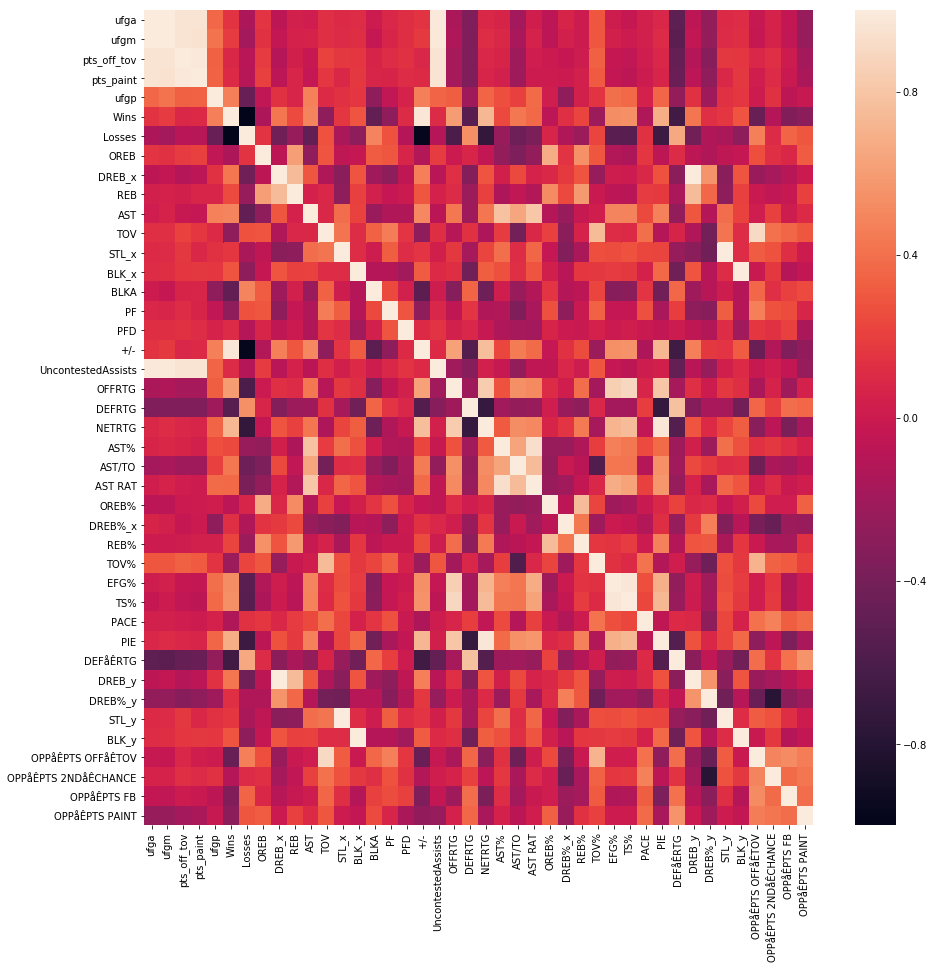

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDFcorr.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

In [ ]:
# Andy Updates
# FinalDF3.to_excel("FinalDF_andyupdates.xls")

In [38]:
# Blazers Updated to Trail Blazers on FinalDF3
# FinalDF3['team'].value_counts()

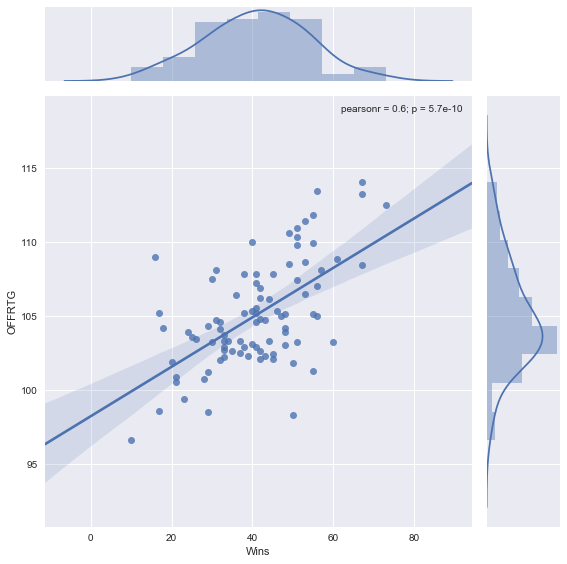

In [39]:
# Andy - linear regression 
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Wins", y="OFFRTG", data=FinalDF3, kind="reg", size=8);
plt.savefig('OFFRTG.png')

In [40]:
# Andy import FinalDF3 where duplicate columns were dropped
FinalDF4 = pd.read_excel("FinalDF_andyupdates.xls")
FinalDF4.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists,GP,MIN_x,MIN_y,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,TOV%,EFG%,TS%,PACE,PIE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,6777,40.8,2073,4617,0.448993,692,2160,32.0,1320,1953,67.6,978,2536,3514,1683,1453,789,487,454,1778,1657,-736,2.742721,82,1364,3961,104.2,0.0,65.7,1.48,18.5,26.4,78.3,17.1,51.8,55.3,103.13,51.3,1687,1144,1200,3420
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839,2.946176,82,3961,3961,106.7,-10.0,59.4,1.31,16.3,20.6,74.0,16.2,48.7,51.9,100.23,42.8,1639,1207,1370,3736
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467,0.322217,82,3966,3966,106.4,-5.7,63.1,1.43,17.6,22.4,75.3,16.4,50.1,53.9,100.96,47.0,1517,1106,1256,3698
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,6722,45.9,2538,5222,0.486021,545,1500,36.3,1312,1734,75.7,876,2574,3450,1932,1373,789,403,392,1814,1649,35,3.016563,82,1301,3986,106.5,0.8,56.9,1.67,17.5,18.8,76.3,13.7,53.4,56.9,97.37,50.3,1374,1092,877,3262
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343,2.290237,82,3966,3966,105.7,-3.5,60.3,1.52,17.7,24.9,73.1,15.7,49.9,53.7,96.55,48.3,1453,1153,1068,3606


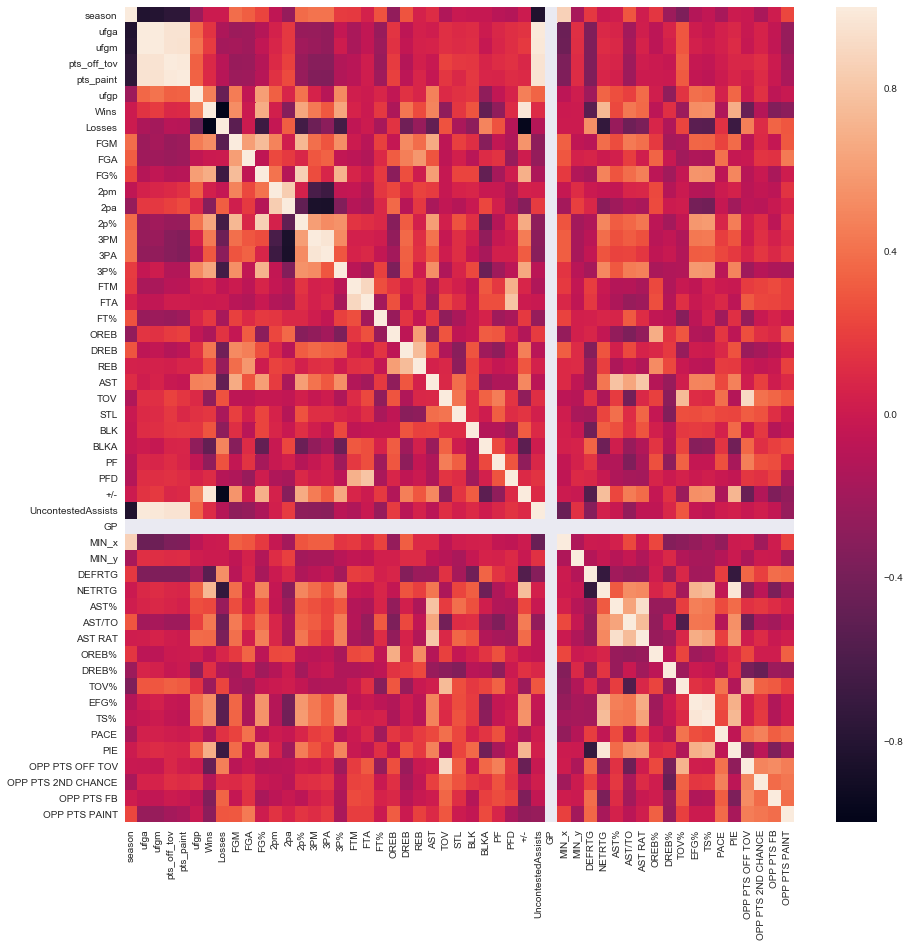

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDF4.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

In [43]:
# Andy filter 2014
season_2014 = FinalDF4[FinalDF4['season']== 2014]
season_2014.reset_index(drop=True)
season_2014.sort_values('Wins', ascending=False)

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists,GP,MIN_x,MIN_y,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,TOV%,EFG%,TS%,PACE,PIE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
84,Warriors,2014,16408,7664,7050,17724,0.467089,67,15,3410,7137,47.8,2527,4920,0.513618,883,2217,39.8,1313,1709,76.8,853,2814,3667,2248,1185,762,496,293,1628,1541,828,3.409253,82,1397,3946,101.3,12.7,69.8,1.90,21.8,21.1,76.8,15.9,58.8,61.9,103.01,58.1,1250,1164,1142,3410
21,Hawks,2014,17052,7604,6866,16540,0.445930,60,22,3121,6699,46.6,2303,4547,0.506488,818,2152,38.0,1349,1735,77.8,715,2611,3326,2111,1167,744,380,404,1457,1611,445,3.602084,82,1397,3946,108.4,-5.1,61.2,1.50,17.8,21.1,74.0,15.7,52.0,55.4,99.75,47.2,1290,1161,916,3232
15,Clippers,2014,16248,7528,5926,15028,0.463319,56,26,3228,6830,47.3,2401,4628,0.518799,827,2202,37.6,1468,2067,71.0,784,2711,3495,2031,1012,640,409,245,1749,1766,540,3.706548,82,1301,3946,106.9,-1.9,53.9,1.36,15.6,24.2,76.6,15.1,50.9,54.8,99.15,47.6,1218,1048,1007,3184
66,Rockets,2014,14360,6028,7330,17984,0.419777,56,26,3032,6832,44.4,2099,4152,0.505539,933,2680,34.8,1525,2133,71.5,958,2624,3582,1820,1366,776,407,437,1803,1730,282,3.312088,82,1296,3961,102.2,11.2,57.8,1.49,17.1,21.8,81.3,15.1,56.5,60.4,101.60,54.9,1504,1149,1253,3616
18,Grizzlies,2014,13568,5896,5658,15808,0.434552,55,27,3097,6763,45.8,2674,5517,0.484684,423,1246,33.9,1445,1869,77.3,856,2634,3490,1777,1094,700,347,424,1567,1662,266,3.317952,82,1397,3981,105.3,-4.0,58.9,1.42,16.7,19.4,77.1,15.3,50.3,54.5,95.66,47.6,1158,954,1101,3196
69,Spurs,2014,13484,5868,5516,15504,0.435182,55,27,3208,6854,46.8,2531,5007,0.505492,677,1847,36.7,1368,1754,78.0,806,2772,3578,2000,1146,657,444,362,1564,1613,508,2.934000,82,1392,3991,101.7,3.3,59.4,1.59,17.5,24.9,79.1,14.8,50.9,54.5,96.61,53.0,1235,979,1156,3482
9,Cavaliers,2014,15680,6772,6624,17432,0.431888,53,29,3089,6739,45.8,2263,4486,0.504458,826,2253,36.7,1453,1934,75.1,911,2612,3523,1814,1171,603,340,368,1510,1685,367,3.733186,82,1397,3956,107.9,3.5,59.1,1.60,18.0,20.1,76.4,14.9,55.8,59.7,99.47,52.0,1329,1017,970,3502
81,Trail Blazers,2014,14756,6360,5018,14056,0.431011,51,31,3175,7049,45.0,2368,4818,0.491490,807,2231,36.2,1272,1589,80.1,879,2881,3760,1799,1117,525,372,297,1494,1534,347,3.535297,82,1349,3971,102.0,1.2,47.6,1.21,14.0,23.3,80.8,14.8,49.7,54.2,98.99,50.9,1241,1129,1094,3534
45,Mavericks,2014,14516,6420,5978,14740,0.442271,50,32,3255,7036,46.3,2523,4954,0.509285,732,2082,35.2,1386,1843,75.2,858,2608,3466,1846,1062,663,371,314,1644,1816,238,3.477790,82,1397,3976,106.0,-4.2,57.9,1.60,16.7,17.7,79.5,13.6,50.5,53.8,97.38,46.5,1245,1150,1301,3352
6,Bulls,2014,14188,6068,5732,15736,0.427685,50,32,3001,6797,44.2,2356,4972,0.473854,645,1825,35.3,1618,2067,78.3,959,2792,3751,1781,1145,514,476,443,1495,1736,246,3.407075,82,1354,3976,107.1,-8.8,59.5,1.60,16.9,20.2,81.2,14.0,48.6,51.4,98.63,44.3,1258,1079,1065,3344


In [62]:
# Andy - drop non playoff teams

# 2013-2014 Playoff Teams
Eastern Conference
1. Pacers
2. Heat
3. Toronto
4. Chicago
5. Wizards
6. Brooklyn
7. Bobcats
8. Hawks

Western Conference
1. Spurs
2. Thunder
3. Clippers
4. Rockets
5. Trail Blazers
6. Warriors
7. Grizzlies
8. Mavericks

Finals
Heat vs Spurs

Champions: Spurs


In [44]:
# Andy filter out 2014 playoff teams

In [45]:
# filter 2015
season_2015 = FinalDF4[FinalDF4['season']== 2015]
season_2015.reset_index(drop=True)

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists,GP,MIN_x,MIN_y,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,TOV%,EFG%,TS%,PACE,PIE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,6887,43.1,2206,4632,0.476252,764,2255,33.9,1284,1850,69.4,777,2605,3382,1765,1343,680,495,466,1780,1571,-839,2.946176,82,3961,3961,106.7,-10.0,59.4,1.31,16.3,20.6,74.0,16.2,48.7,51.9,100.23,42.8,1639,1207,1370,3736
1,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,6740,46.7,2705,5463,0.495149,440,1277,34.5,1391,1859,74.8,858,2559,3417,1895,1247,672,475,462,1695,1600,-343,2.290237,82,3966,3966,105.7,-3.5,60.3,1.52,17.7,24.9,73.1,15.7,49.9,53.7,96.55,48.3,1453,1153,1068,3606
2,Bulls,2015,13356,5840,6488,17716,0.437257,42,40,3165,7170,44.1,2514,5417,0.464095,651,1753,37.1,1354,1720,78.7,907,2889,3796,1870,1141,495,470,465,1545,1535,-121,3.122995,82,3981,3981,103.9,-1.8,59.1,1.64,17.1,24.5,74.9,14.0,48.7,52.6,98.25,49.4,1314,1169,1128,3642
3,Cavaliers,2015,15932,7128,6218,15892,0.447401,57,25,3171,6888,46.0,2291,4460,0.513677,880,2428,36.2,1333,1783,74.8,873,2777,3650,1861,1114,551,317,362,1666,1690,492,3.830199,82,3971,3971,102.3,5.8,58.7,1.67,17.5,25.1,78.5,14.1,52.4,55.8,95.48,52.8,1278,919,917,3344
4,Celtics,2015,13976,5812,7596,19812,0.415856,48,34,3216,7318,43.9,2499,5176,0.482805,717,2142,33.5,1520,1929,78.8,950,2733,3683,1981,1127,752,348,450,1796,1718,263,2.933872,82,3956,3956,100.9,3.0,61.6,1.76,17.6,25.1,74.6,13.5,48.8,53.1,101.15,52.0,1211,1164,888,3524
5,Clippers,2015,14640,6636,6218,15792,0.453279,53,29,3141,6759,46.5,2344,4569,0.513023,797,2190,36.4,1490,2152,69.2,721,2727,3448,1873,1063,709,460,259,1746,1842,351,3.542979,82,3966,3966,100.9,5.5,59.6,1.76,17.6,20.1,73.8,13.2,52.4,55.6,97.97,53.3,1191,1135,1016,3386
6,Grizzlies,2015,13328,5572,7554,18924,0.418067,42,40,3019,6859,44.0,2515,5338,0.471150,504,1521,33.1,1584,2024,78.3,916,2497,3413,1697,1090,724,350,469,1783,1732,-184,3.283441,82,3966,3966,105.4,-2.9,56.2,1.56,16.1,25.3,75.1,13.8,47.7,52.4,95.65,48.3,1239,970,1198,3160
7,Hawks,2015,17520,7644,7912,19304,0.436301,48,34,3168,6923,45.8,2353,4597,0.511856,815,2326,35.0,1282,1638,78.3,679,2772,3451,2100,1226,747,486,411,1570,1500,296,3.640000,82,3966,3966,98.8,4.1,66.3,1.71,19.1,19.1,74.6,15.0,51.6,55.2,99.40,52.8,1308,1071,976,3354
8,Heat,2015,13152,5884,9304,25712,0.447384,48,34,3150,6697,47.0,2652,5217,0.508338,498,1480,33.6,1405,1887,74.5,807,2811,3618,1709,1155,553,531,337,1502,1608,135,3.442949,82,3966,3966,101.5,2.6,54.3,1.48,16.4,23.8,77.8,14.7,50.8,54.5,95.75,52.5,1278,1062,879,3444
9,Hornets,2015,13848,5864,5226,13868,0.423455,48,34,3036,6922,43.9,2163,4512,0.479388,873,2410,36.2,1534,1941,79.0,734,2869,3603,1778,1029,595,438,448,1487,1670,223,3.298088,82,3971,3971,101.8,3.3,58.6,1.73,16.8,20.0,79.8,12.7,50.2,54.5,97.80,51.1,1155,933,1017,3280


In [46]:
# filter 2016
season_2016 = FinalDF4[FinalDF4['season']== 2016]
season_2016.reset_index(drop=True)

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists,GP,MIN_x,MIN_y,DEFRTG,NETRTG,AST%,AST/TO,AST RAT,OREB%,DREB%,TOV%,EFG%,TS%,PACE,PIE,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
0,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,6992,44.2,2257,4549,0.496153,831,2443,34.0,1393,1806,77.1,807,2706,3513,1949,1366,692,420,446,1793,1610,-467,0.322217,82,3966,3966,106.4,-5.7,63.1,1.43,17.6,22.4,75.3,16.4,50.1,53.9,100.96,47.0,1517,1106,1256,3698
1,Bucks,2016,1288,524,660,1644,0.406832,42,40,3182,6715,47.4,2462,4769,0.516251,720,1946,37.0,1413,1839,76.8,723,2589,3312,1984,1145,666,436,375,1660,1579,-15,0.264113,82,3956,3956,106.4,0.5,62.4,1.73,18.6,21.5,75.4,14.4,52.7,56.5,96.73,50.4,1331,1040,961,3580
2,Bulls,2016,1476,640,670,1800,0.433604,41,41,3169,7141,44.4,2546,5310,0.479473,623,1831,34.0,1474,1848,79.8,999,2797,3796,1851,1112,643,393,378,1455,1541,35,0.345759,82,3956,3956,104.5,0.1,58.4,1.66,17.0,27.0,76.8,13.8,48.7,53.0,97.72,50.4,1267,977,1125,3710
3,Cavaliers,2016,1400,612,500,1260,0.437143,51,31,3275,6963,47.0,2208,4184,0.527725,1067,2779,38.4,1431,1913,74.8,766,2821,3587,1858,1121,539,327,349,1486,1690,261,0.329386,82,3976,3976,108.0,2.9,56.7,1.66,17.2,21.9,75.8,13.7,54.7,58.0,98.38,51.0,1365,1122,1094,3650
4,Celtics,2016,1396,608,562,1560,0.435530,53,29,3168,6978,45.4,2183,4236,0.515345,985,2742,35.9,1536,1903,80.7,744,2698,3442,2069,1088,617,340,425,1686,1664,216,0.293862,82,3951,3951,105.5,3.1,65.3,1.90,18.9,21.2,75.3,13.3,52.5,56.7,99.32,51.4,1245,1143,1002,3544
5,Clippers,2016,1512,668,620,1640,0.441799,51,31,3242,6820,47.5,2401,4575,0.524809,841,2245,37.5,1586,2128,74.5,738,2790,3528,1848,1062,612,347,258,1626,1835,352,0.361472,82,3951,3951,105.8,4.5,57.0,1.74,17.3,21.5,76.9,13.1,53.7,57.4,98.22,52.7,1247,1044,1171,3502
6,Grizzlies,2016,1616,616,650,1428,0.381188,43,39,2984,6854,43.5,2217,4685,0.473212,767,2169,35.4,1504,1918,78.4,886,2621,3507,1744,1059,653,344,410,1840,1708,40,0.353211,82,3981,3981,104.5,0.1,58.4,1.65,16.6,24.8,77.5,13.5,49.1,53.5,94.74,50.1,1217,946,1199,3096
7,Hawks,2016,1404,640,736,1568,0.455840,43,39,3123,6918,45.1,2394,4781,0.500732,729,2137,34.1,1484,2039,72.8,842,2793,3635,1938,1294,672,397,424,1491,1768,-70,0.330237,82,3976,3976,103.1,-0.8,62.1,1.50,17.5,23.6,76.1,15.7,50.4,54.1,99.83,50.6,1425,1083,1048,3210
8,Heat,2016,1172,476,482,1392,0.406143,41,41,3202,7037,45.5,2394,4824,0.496269,808,2213,36.5,1248,1768,70.6,872,2705,3577,1742,1102,588,469,398,1680,1530,87,0.273249,82,3956,3956,104.1,1.0,54.4,1.58,16.3,24.2,76.4,13.7,51.2,54.1,97.59,50.0,1142,1053,844,3646
9,Hornets,2016,1288,516,496,1316,0.400621,36,46,3093,7000,44.2,2269,4653,0.487642,824,2347,35.1,1591,1953,81.5,721,2853,3574,1891,942,571,390,450,1360,1631,16,0.272871,82,3966,3966,106.1,0.3,61.1,2.01,17.7,19.9,79.6,11.7,50.1,54.7,97.85,50.5,1071,937,1055,3320


<br><br>
**Analyze Correlation for all seasons bewtween Wins and Defensive Stats**

In [47]:
# Andy - analyze defensive stats
FinalDF4_defense = FinalDF4.filter(['team', 'pts_off_tov', 'Wins', 'Losses', 'DREB', 'STL', 'BLK', 'DEFRTG'])

In [48]:
# Andy - print defense DF
FinalDF4_defense.head()

,team,pts_off_tov,Wins,Losses,DREB,STL,BLK,DEFRTG
0,76ers,6202,18,64,2536,789,487,104.2
1,76ers,7514,10,72,2605,680,495,106.7
2,76ers,626,28,54,2706,692,420,106.4
3,Bucks,6326,41,41,2574,789,403,106.5
4,Bucks,5922,33,49,2559,672,475,105.7


In [49]:
# Andy - get shape of defense DF
FinalDF4_defense.shape

(90, 8)

In [50]:
# Sort Win Columns 
FinalDF4_defense.sort_values('Wins', ascending=False).head()

,team,pts_off_tov,Wins,Losses,DREB,STL,BLK,DEFRTG
85,Warriors,6948,73,9,2972,689,498,100.9
70,Spurs,7772,67,15,2831,677,485,96.6
86,Warriors,640,67,15,2873,785,555,101.1
84,Warriors,7050,67,15,2814,762,496,101.3
71,Spurs,568,61,21,2777,655,484,100.9


In [51]:
# Andy - Correlation test pts_off_tov and Wins
FinalDF4_defense['Wins'].corr(FinalDF4_defense['pts_off_tov'])

0.087865470605446208

In [52]:
# Andy - Correlation test
FinalDF4_defense[['Wins', 'pts_off_tov']].corr()

,Wins,pts_off_tov
Wins,1.000000,0.087865
pts_off_tov,0.087865,1.000000


**Positive Correlation between Wins and Defensive Rebounds**

In [53]:
# Andy - Correlation DREB
FinalDF4_defense[['Wins', 'DREB']].corr()

,Wins,DREB
Wins,1.000000,0.428598
DREB,0.428598,1.000000


In [54]:
# Andy - Correlation Wins vs Steals
FinalDF4_defense[['Wins', 'STL']].corr()

,Wins,STL
Wins,1.000000,0.160116
STL,0.160116,1.000000


In [55]:
# Andy - Correlation Wins vs Blocks
FinalDF4_defense[['Wins', 'BLK']].corr()

,Wins,BLK
Wins,1.000000,0.281646
BLK,0.281646,1.000000


In [56]:
# Andy - Points allowed per 100 posessions
FinalDF4_defense[['Wins', 'DEFRTG']].corr()

,Wins,DEFRTG
Wins,1.000000,-0.538448
DEFRTG,-0.538448,1.000000


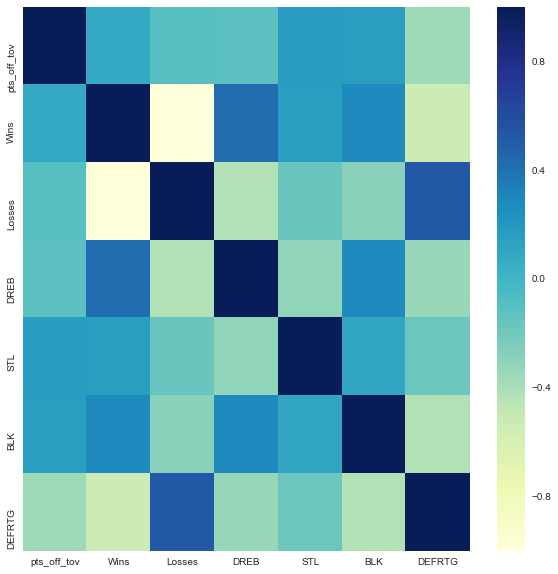

In [57]:
# Andy - heat map

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDF4_defense.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="YlGnBu");

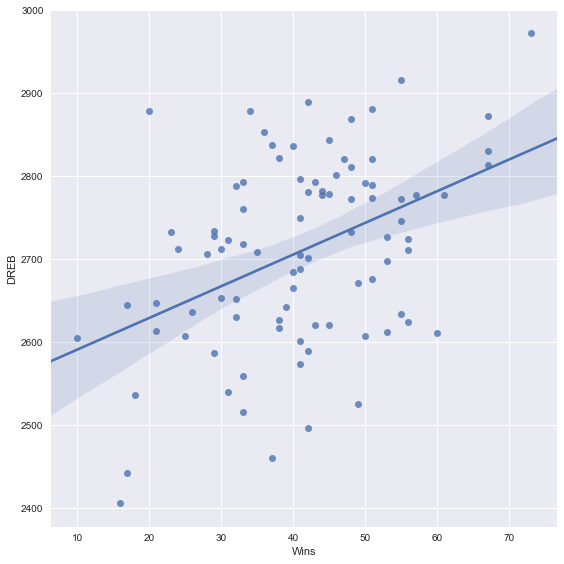

In [58]:
# Andy - linear regression wins vs dreb
sns.set(color_codes=True)
sns.lmplot(x="Wins", y="DREB", data=FinalDF4_defense, size=8);

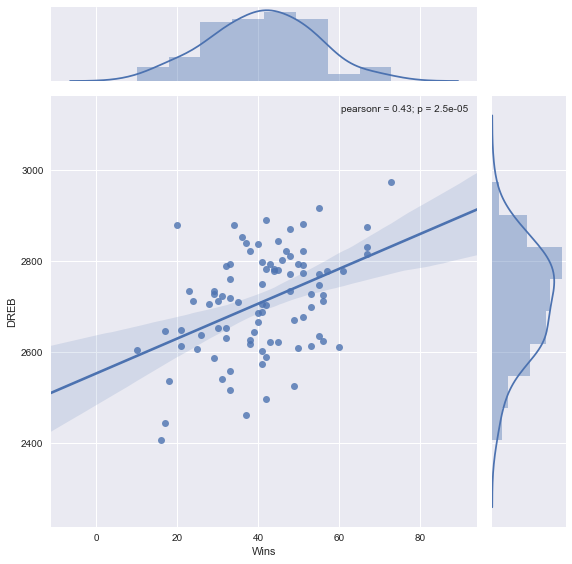

In [59]:
# Andy - linear regression 2
sns.set(color_codes=True)
sns.jointplot(x="Wins", y="DREB", data=FinalDF4_defense, kind="reg", size=8);
plt.savefig('test.png')

In [60]:
# Andy - Sort DF by DREB
FinalDF4_defense.sort_values('DREB', ascending=False).head()

,team,pts_off_tov,Wins,Losses,DREB,STL,BLK,DEFRTG
85,Warriors,6948,73,9,2972,689,498,100.9
76,Thunder,8906,55,27,2916,603,487,103.0
7,Bulls,6488,42,40,2889,495,470,103.9
81,Trail Blazers,5018,51,31,2881,525,372,102.0
50,Nets,640,20,62,2879,593,387,108.0
